<h1><center><b><ins>Clustering and its examples</ins></b></center></h1>

---
<br/><br/>
  Topics covered:
*   What is clustering and its use cases
*   Different Clustering techniques
*   Algorithm and sample code
</br></br>

##***What is Clustering***
Clustering is an unsupervised learning algorithm where data points are segregated into groups. The grouping is done with the aim of classifying similar data points in the same group and dissimilar points in different groups. </br> 
This algorithm is often used in Customer Segmentation to devise different marketing strategies, Anomaly Detection to identify fraud or defective parts, Spam filter for emails and so many more creative and interesting use cases.
</br></br>

##***Different Clustering Algorithms***

###1.  **K-Means Clustering**
This is the most common type of clustering technique. The 'K' in K-Means represents the number of clusters that you set as the hyperparameter. Each cluster is linked to a centroid and the main aim of the algorithm is to reduce the distance between a data point and its corresponding cluster. Since you may not always know the optimum number of clusters present, you'll have to use the Elbow Method. The Elbow method presents an easy solution to find the optimum number of cluster by using the sum of squared distance between each point and the centroid of the cluster. The centroids will have to randomly initialized. The choose the best value of the hyperparameter 'K', it is best to first plot the data and then choose a resonable value.</br>
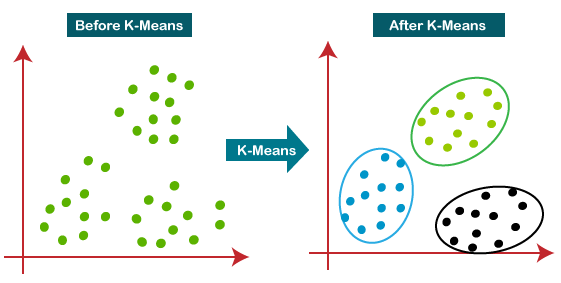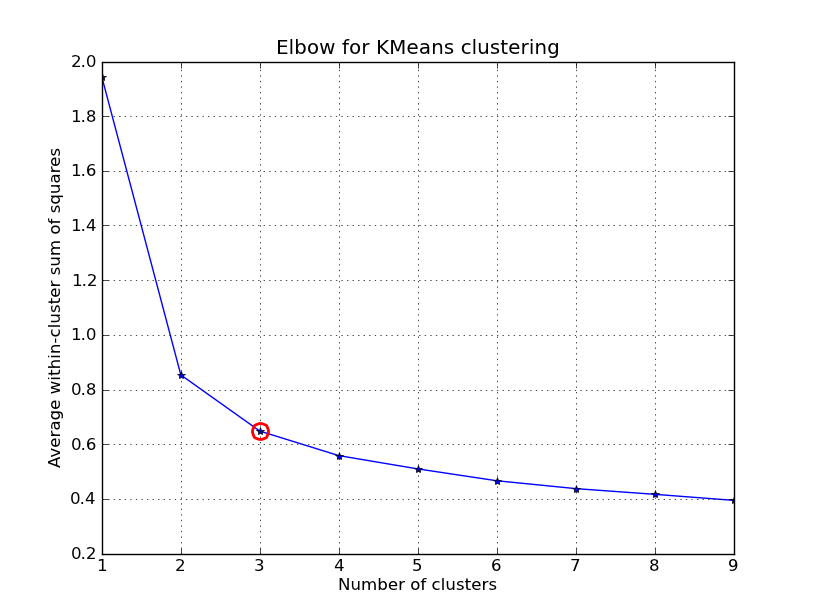

###2.   **Mean-Shift Clustering**
Mean-Shift Clustering is also a centroid dependent algorithm. Here the goal is to update the centroid to be the mean of the data points within a sliding window. A sliding window in Mean-Shift clustering is typically a circle with some fixed raidus 'R' which will keep moving towards regions of higher density as the center of the sliding window is shifted to the mean of the points within the window.</br>
The difference compared to other clustering algorithms, which can also be seen as an advantage, is that there is no need to predefine the number of clusters. The optimum number of clusters is will be determined by the algorithm itself.</br>
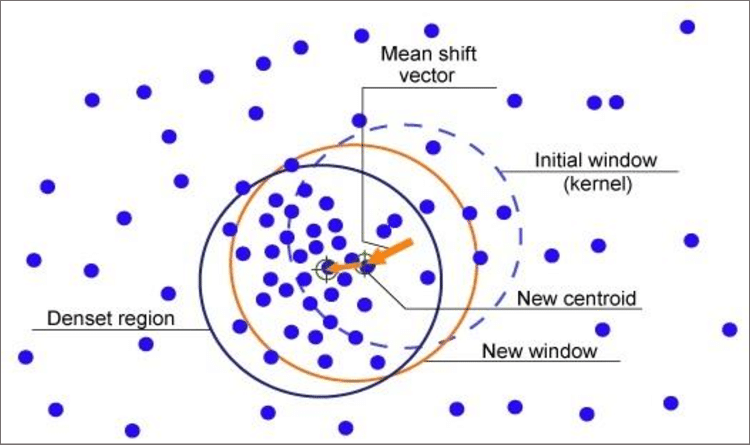
###3.   **Hierarchical Clustering**
In this clustering technique the goal is to build a heirarchy of clusters which can be represented by a dendogram.
Heirarchial clustering is classified into 2 types: Agglomerative Hierarchial Clustering (bottom-up) and Divisive Hierarchial Clustering (top-down).</br>
Agglomerative Hierarchial Clustering is more famous out of the two and it is called bottom-up because it treates every data point as an individual cluster in the beginning and then merges the nearest cluster until there is only one cluster remaining.</br>
Though there are multiple ways of measuring the distance between the two cluster the easiest method is called Centroid Linkage. In this measurement technique the centroid of each cluster is calculated and then the distance between the two centroids is determinded. Other distance measurement methods include Average Linkage, Single Linkage and Complete Linkage.</br>
Average Linkage method is when the distance between each pair of data points within each cluster are added up and then divided by the number of pairs to get average inter-cluster distance.</br>
Single Linkage is the distance between the nearest point of two different clusters.
Complete Linkage is the distance between the farthest point between two different clusters.
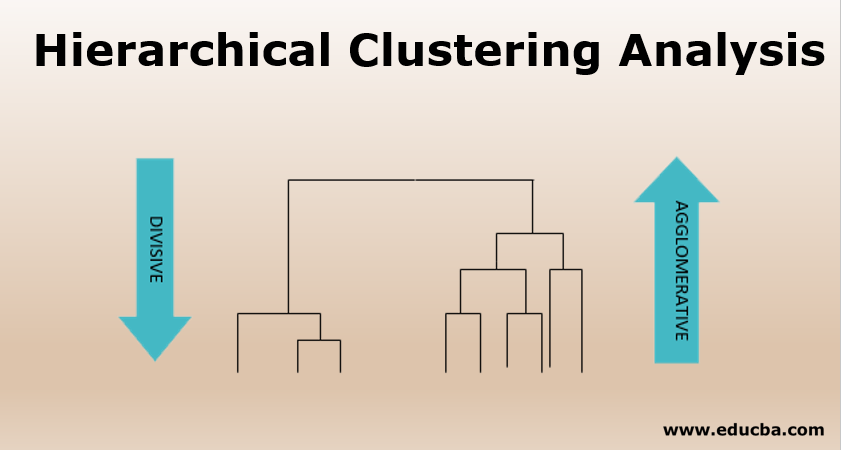
</br></br>


##***Algorithm and Code***
We'll look at the Algorithm for K-Mean Clustering and then we'll code it up using a simple Iris Classification dataset

1.   First specify the number of clusters 'K'
2.   Initialize the 'K' centroids randomly
3.   Compute the Within Cluster Sum Squared distance(WCSS) between each data point and the centroid
4.   Assign each data point to the nearest clustes
5.   Keep updating the centroid there is no change in the assignment of data point to a cluster
6.   Repeat the above process for different number of clusters 'K', so that we can find the optimum number of clusters

Now we'll code this algorithm in Python. To give a brief description of the dataset, it consist of 3 types of Iris called: Sentosa, Versicolor and Virginica. 



In [1]:
# We'll first import the necessay packages for Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [3]:
# Have look at the dataset
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
ds = 'Iris.csv'
data = pd.read_csv(ds)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Since this is an Unspervised learning task, we don't need the true labe values, so we'll drop the last column
df = data.iloc[:,:4].values

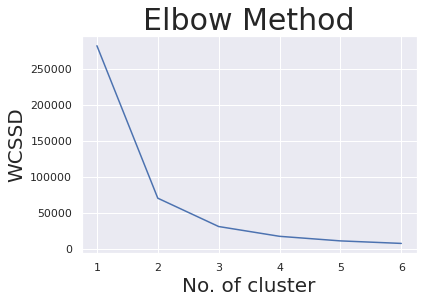

In [7]:
# PERFORM CLUSTERING AND FIT OPTIMUM NUMBER OF CLUSTERS USING ELBOW METHOD

wcssd=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcssd_iter = kmeans.inertia_
    wcssd.append(wcssd_iter)

number_cluster = range(1,7)
plt.plot(number_cluster,wcssd)
plt.title('Elbow Method',fontsize=30)
plt.xlabel('No. of cluster',fontsize=20)
plt.ylabel('WCSSD',fontsize=20)
plt.show()

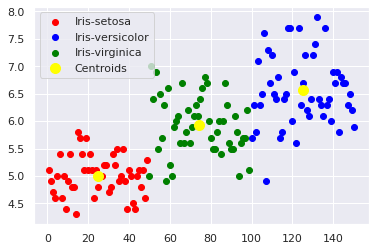

In [8]:
# HENCE, 3 IS THE OPTIMUM NUMBER OF CLUSTERS
# SO NOW WE CAN PLOT THE CLUSTERS WITH THEIR CENTERS
kmeans = KMeans(3)
kmeans.fit(df)
identified_clusters = kmeans.fit_predict(df)
plt.scatter(df[identified_clusters == 0 ,0], df[identified_clusters == 0 ,1], c='Red', label='Iris-setosa')
plt.scatter(df[identified_clusters == 1 ,0], df[identified_clusters == 1 ,1], c='Blue', label='Iris-versicolor')
plt.scatter(df[identified_clusters == 2 ,0], df[identified_clusters == 2 ,1], c='Green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()